In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Working with a simple dts

In [3]:
time_format = '%Y-%m-%d %H:%M'

In [4]:
date_list = ['20100101 00:00', '20100101 01:00', '20100101 02:00', '20100101 03:00', '20100101 04:00', '20100101 05:00',
 '20100101 06:00', '20100101 07:00', '20100101 08:00', '20100101 09:00', '20100101 10:00']

In [5]:
date_list

['20100101 00:00',
 '20100101 01:00',
 '20100101 02:00',
 '20100101 03:00',
 '20100101 04:00',
 '20100101 05:00',
 '20100101 06:00',
 '20100101 07:00',
 '20100101 08:00',
 '20100101 09:00',
 '20100101 10:00']

In [6]:
temperature_list = [46.0, 45.2, 46.0, 49.4, 52.7, 55.7, 58.0, 60.0, 61.4, 62.3, 70.3]

In [7]:
temperature_list

[46.0, 45.2, 46.0, 49.4, 52.7, 55.7, 58.0, 60.0, 61.4, 62.3, 70.3]

In [8]:
# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format) 

In [9]:
my_datetimes

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               '2010-01-01 10:00:00'],
              dtype='datetime64[ns]', freq=None)

In [10]:
# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)
# output is sort of like a zip. gives you two columns, the dts and the values

In [11]:
time_series

2010-01-01 00:00:00    46.0
2010-01-01 01:00:00    45.2
2010-01-01 02:00:00    46.0
2010-01-01 03:00:00    49.4
2010-01-01 04:00:00    52.7
2010-01-01 05:00:00    55.7
2010-01-01 06:00:00    58.0
2010-01-01 07:00:00    60.0
2010-01-01 08:00:00    61.4
2010-01-01 09:00:00    62.3
2010-01-01 10:00:00    70.3
dtype: float64

In [13]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = time_series.loc['2010-01-01 00:00:00':'2010-01-01 02:00:00']

In [14]:
ts1

2010-01-01 00:00:00    46.0
2010-01-01 01:00:00    45.2
2010-01-01 02:00:00    46.0
dtype: float64

In [16]:
# Extract the date '2010-07-04' from ts0: ts2 - this will give everything
ts2 = time_series.loc['2010-01-01']

In [17]:
ts2

2010-01-01 00:00:00    46.0
2010-01-01 01:00:00    45.2
2010-01-01 02:00:00    46.0
2010-01-01 03:00:00    49.4
2010-01-01 04:00:00    52.7
2010-01-01 05:00:00    55.7
2010-01-01 06:00:00    58.0
2010-01-01 07:00:00    60.0
2010-01-01 08:00:00    61.4
2010-01-01 09:00:00    62.3
2010-01-01 10:00:00    70.3
dtype: float64

## DTS Stamping and Indexing

In [18]:
tempdf = pd.read_csv('weather_data_austin_2010.csv')

In [19]:
tempdf

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00
...,...,...,...,...
8754,51.1,38.1,1.0,20101231 19:00
8755,49.0,37.9,1.0,20101231 20:00
8756,47.9,37.9,1.0,20101231 21:00
8757,46.9,37.9,1.0,20101231 22:00


In [76]:
# create a new dts list
dts = pd.to_datetime(tempdf['Date'])

In [77]:
dts

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: Date, Length: 8759, dtype: datetime64[ns]

In [78]:
# add the dts list as a new column into the dataframe
tempdf['DTS'] = dts

In [79]:
tempdf

,Temperature,DewPoint,Pressure,Date,DTS
0,46.2,37.5,1.0,20100101 00:00,2010-01-01 00:00:00
1,44.6,37.1,1.0,20100101 01:00,2010-01-01 01:00:00
2,44.1,36.9,1.0,20100101 02:00,2010-01-01 02:00:00
3,43.8,36.9,1.0,20100101 03:00,2010-01-01 03:00:00
4,43.5,36.8,1.0,20100101 04:00,2010-01-01 04:00:00
...,...,...,...,...,...
8754,51.1,38.1,1.0,20101231 19:00,2010-12-31 19:00:00
8755,49.0,37.9,1.0,20101231 20:00,2010-12-31 20:00:00
8756,47.9,37.9,1.0,20101231 21:00,2010-12-31 21:00:00
8757,46.9,37.9,1.0,20101231 22:00,2010-12-31 22:00:00


In [80]:
# drop the existing Date column
tempdf.drop(['Date'], axis =1)

,Temperature,DewPoint,Pressure,DTS
0,46.2,37.5,1.0,2010-01-01 00:00:00
1,44.6,37.1,1.0,2010-01-01 01:00:00
2,44.1,36.9,1.0,2010-01-01 02:00:00
3,43.8,36.9,1.0,2010-01-01 03:00:00
4,43.5,36.8,1.0,2010-01-01 04:00:00
...,...,...,...,...
8754,51.1,38.1,1.0,2010-12-31 19:00:00
8755,49.0,37.9,1.0,2010-12-31 20:00:00
8756,47.9,37.9,1.0,2010-12-31 21:00:00
8757,46.9,37.9,1.0,2010-12-31 22:00:00


In [81]:
tempdf2 = tempdf.reindex(columns=['DTS', 'Temperature', 'DewPoint', 'Pressure'])

In [82]:
tempdf2

,DTS,Temperature,DewPoint,Pressure
0,2010-01-01 00:00:00,46.2,37.5,1.0
1,2010-01-01 01:00:00,44.6,37.1,1.0
2,2010-01-01 02:00:00,44.1,36.9,1.0
3,2010-01-01 03:00:00,43.8,36.9,1.0
4,2010-01-01 04:00:00,43.5,36.8,1.0
...,...,...,...,...
8754,2010-12-31 19:00:00,51.1,38.1,1.0
8755,2010-12-31 20:00:00,49.0,37.9,1.0
8756,2010-12-31 21:00:00,47.9,37.9,1.0
8757,2010-12-31 22:00:00,46.9,37.9,1.0


In [84]:
# Make DTS the index column
tempdf2.index = tempdf['DTS']
tempdf2

,DTS,Temperature,DewPoint,Pressure
DTS,,,,
2010-01-01 00:00:00,2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,2010-01-01 04:00:00,43.5,36.8,1.0
...,...,...,...,...
2010-12-31 19:00:00,2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,2010-12-31 21:00:00,47.9,37.9,1.0


In [87]:
# drop the normal non-index dts column
tempdf2.drop(['DTS'], axis =1)

,Temperature,DewPoint,Pressure
DTS,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
...,...,...,...
2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,47.9,37.9,1.0


## Downsampling, Resampling and Seperating

In [89]:
# downsample data to 6 hour intervals with the mean of the six hours: NOTE, this is for all columns.
# to downsample for a specific column, chain the method: tempdf2.Temperature.resample('6h').mean()
tempdf3 = tempdf2.resample('6h').mean()
tempdf3

,Temperature,DewPoint,Pressure
DTS,,,
2010-01-01 00:00:00,44.200000,36.950000,1.0
2010-01-01 06:00:00,45.933333,37.133333,1.0
2010-01-01 12:00:00,57.766667,38.366667,1.0
2010-01-01 18:00:00,49.450000,38.416667,1.0
2010-01-02 00:00:00,44.516667,37.700000,1.0
...,...,...,...
2010-12-30 18:00:00,49.150000,38.016667,1.0
2010-12-31 00:00:00,44.133333,36.983333,1.0
2010-12-31 06:00:00,45.916667,36.933333,1.0


In [92]:
# Downsample to daily data and count the number of data points: df2
tempdf4 = tempdf2.resample('D').count()
tempdf4

,DTS,Temperature,DewPoint,Pressure
DTS,,,,
2010-01-01,24,24,24,24
2010-01-02,24,24,24,24
2010-01-03,24,24,24,24
2010-01-04,24,24,24,24
2010-01-05,24,24,24,24
...,...,...,...,...
2010-12-27,24,24,24,24
2010-12-28,24,24,24,24
2010-12-29,24,24,24,24


In [101]:
# separate the Temperature column
august = tempdf2.loc['2010-08-01':'2010-08-31']

In [102]:
august

,DTS,Temperature,DewPoint,Pressure
DTS,,,,
2010-08-01 00:00:00,2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,2010-08-01 04:00:00,75.1,71.4,1.0
...,...,...,...,...
2010-08-31 19:00:00,2010-08-31 19:00:00,86.6,67.2,1.0
2010-08-31 20:00:00,2010-08-31 20:00:00,83.4,67.8,1.0
2010-08-31 21:00:00,2010-08-31 21:00:00,81.2,68.4,1.0


In [103]:
# get the august highest temperatures per day
august_highs = august.Temperature.resample('D').max()

In [104]:
august_highs

DTS
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
2010-08-11    95.0
2010-08-12    94.9
2010-08-13    95.0
2010-08-14    94.9
2010-08-15    94.7
2010-08-16    94.7
2010-08-17    94.8
2010-08-18    94.8
2010-08-19    94.8
2010-08-20    94.8
2010-08-21    94.7
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64

In [107]:
# Extract temperature data for February: february
february = tempdf3.loc['2010-02-01':'2010-02-28']

In [108]:
february

,Temperature,DewPoint,Pressure
DTS,,,
2010-02-01 00:00:00,45.916667,39.833333,1.0
2010-02-01 06:00:00,47.666667,39.900000,1.0
2010-02-01 12:00:00,59.450000,40.633333,1.0
2010-02-01 18:00:00,52.233333,40.966667,1.0
2010-02-02 00:00:00,46.350000,40.383333,1.0
...,...,...,...
2010-02-27 18:00:00,57.916667,44.616667,1.0
2010-02-28 00:00:00,50.866667,44.216667,1.0
2010-02-28 06:00:00,53.433333,44.416667,1.0


In [109]:
# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.Temperature.resample('D').min()

In [110]:
february_lows

DTS
2010-02-01    45.916667
2010-02-02    46.350000
2010-02-03    46.566667
2010-02-04    46.483333
2010-02-05    46.350000
2010-02-06    46.150000
2010-02-07    46.233333
2010-02-08    46.600000
2010-02-09    46.650000
2010-02-10    46.683333
2010-02-11    47.083333
2010-02-12    47.400000
2010-02-13    47.883333
2010-02-14    48.466667
2010-02-15    48.850000
2010-02-16    49.066667
2010-02-17    49.133333
2010-02-18    49.233333
2010-02-19    49.566667
2010-02-20    49.816667
2010-02-21    49.833333
2010-02-22    49.883333
2010-02-23    49.933333
2010-02-24    50.266667
2010-02-25    50.666667
2010-02-26    50.683333
2010-02-27    50.766667
2010-02-28    50.866667
Freq: D, Name: Temperature, dtype: float64

## Rolling Mean (Moving Average) and Smoothing

In [114]:
# dropping the un-needed column
august.drop(['DTS'], axis =1)

,Temperature,DewPoint,Pressure
DTS,,,
2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,75.1,71.4,1.0
...,...,...,...
2010-08-31 19:00:00,86.6,67.2,1.0
2010-08-31 20:00:00,83.4,67.8,1.0
2010-08-31 21:00:00,81.2,68.4,1.0


In [117]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = august['Temperature']['2010-08-01':'2010-08-15']
unsmoothed

DTS
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
                       ... 
2010-08-15 19:00:00    88.8
2010-08-15 20:00:00    85.5
2010-08-15 21:00:00    83.3
2010-08-15 22:00:00    81.6
2010-08-15 23:00:00    80.0
Name: Temperature, Length: 360, dtype: float64

In [118]:
# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()
smoothed

DTS
2010-08-01 00:00:00          NaN
2010-08-01 01:00:00          NaN
2010-08-01 02:00:00          NaN
2010-08-01 03:00:00          NaN
2010-08-01 04:00:00          NaN
                         ...    
2010-08-15 19:00:00    84.179167
2010-08-15 20:00:00    84.175000
2010-08-15 21:00:00    84.175000
2010-08-15 22:00:00    84.175000
2010-08-15 23:00:00    84.170833
Name: Temperature, Length: 360, dtype: float64

In [121]:
# Create a new DataFrame with columns smoothed and unsmoothed: august
august_dict = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})
august_dict

,smoothed,unsmoothed
DTS,,
2010-08-01 00:00:00,NaN,79.0
2010-08-01 01:00:00,NaN,77.4
2010-08-01 02:00:00,NaN,76.4
2010-08-01 03:00:00,NaN,75.7
2010-08-01 04:00:00,NaN,75.1
...,...,...
2010-08-15 19:00:00,84.179167,88.8
2010-08-15 20:00:00,84.175000,85.5
2010-08-15 21:00:00,84.175000,83.3


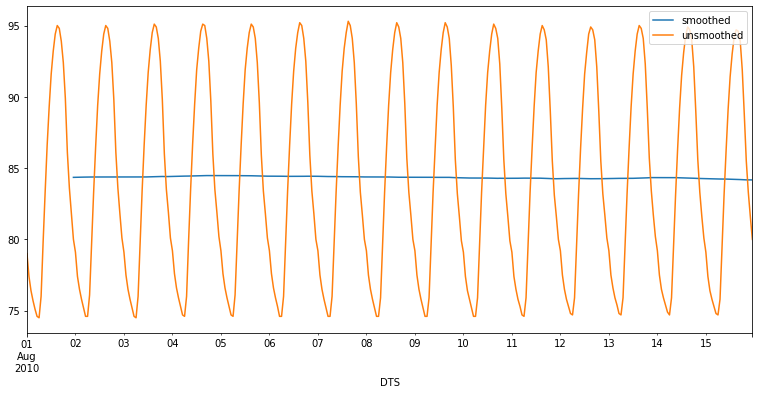

In [125]:
# plot the moving average
august_dict.plot(figsize=(13,6))
plt.show()

In [135]:
smoothed2 = unsmoothed.rolling(window=12).mean()
smoothed2

DTS
2010-08-01 00:00:00          NaN
2010-08-01 01:00:00          NaN
2010-08-01 02:00:00          NaN
2010-08-01 03:00:00          NaN
2010-08-01 04:00:00          NaN
                         ...    
2010-08-15 19:00:00    90.033333
2010-08-15 20:00:00    90.533333
2010-08-15 21:00:00    90.550000
2010-08-15 22:00:00    90.166667
2010-08-15 23:00:00    89.408333
Name: Temperature, Length: 360, dtype: float64

In [136]:
august_dict2 = pd.DataFrame({'smoothed':smoothed2, 'unsmoothed':unsmoothed})
august_dict2

,smoothed,unsmoothed
DTS,,
2010-08-01 00:00:00,NaN,79.0
2010-08-01 01:00:00,NaN,77.4
2010-08-01 02:00:00,NaN,76.4
2010-08-01 03:00:00,NaN,75.7
2010-08-01 04:00:00,NaN,75.1
...,...,...
2010-08-15 19:00:00,90.033333,88.8
2010-08-15 20:00:00,90.533333,85.5
2010-08-15 21:00:00,90.550000,83.3


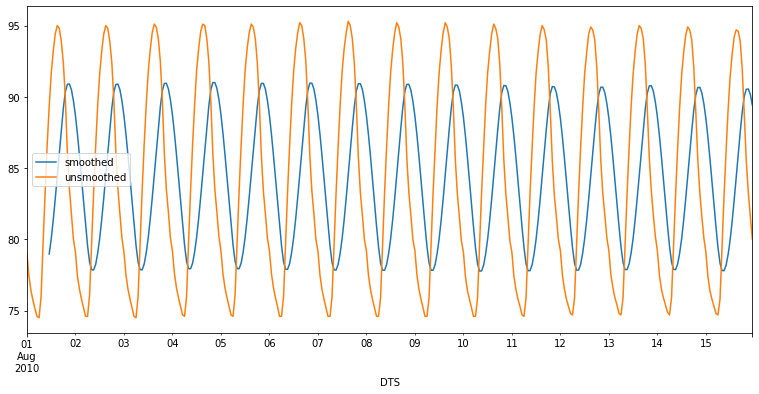

In [137]:
# plot the moving average
august_dict2.plot(figsize=(13,6))
plt.show()